In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading penguins data
penguins_df = pd.read_csv('penguins.csv')

In [3]:
penguins_df.drop('year',inplace=True,axis=1)

In [4]:
penguins_df.shape

(344, 7)

In [5]:
penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [7]:
# Converting the string columns to categorical data
species_conversion = {'Adelie':0,'Chinstrap':1,'Gentoo':2}
island_conversion = {'Biscoe':0,'Dream':1,'Torgersen':2}
sex_conversion={'male':0,'female':1}

In [8]:
penguins_df['species'] = penguins_df['species'].map(species_conversion)
penguins_df['island'] = penguins_df['island'].map(island_conversion)
penguins_df['sex'] = penguins_df['sex'].map(sex_conversion)

In [9]:
penguins_df.dtypes

species                int64
island                 int64
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                  float64
dtype: object

In [10]:
penguins_df.min()

species                 0.0
island                  0.0
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
sex                     0.0
dtype: float64

In [11]:
penguins_df.max()

species                 2.0
island                  2.0
bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
sex                     1.0
dtype: float64

In [12]:
df_max_scaled = penguins_df.copy()
  
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
display(df_max_scaled)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,1.0,0.656040,0.869767,0.783550,0.595238,0.0
1,0.0,1.0,0.662752,0.809302,0.805195,0.603175,1.0
2,0.0,1.0,0.676174,0.837209,0.844156,0.515873,1.0
3,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,0.615772,0.897674,0.835498,0.547619,1.0
...,...,...,...,...,...,...,...
339,0.5,0.5,0.936242,0.920930,0.896104,0.634921,0.0
340,0.5,0.5,0.729866,0.841860,0.874459,0.539683,1.0
341,0.5,0.5,0.832215,0.846512,0.835498,0.599206,0.0
342,0.5,0.5,0.852349,0.883721,0.909091,0.650794,0.0


In [13]:
df_max_scaled=df_max_scaled.dropna()

In [14]:
msk = np.random.rand(len(df_max_scaled)) < 0.8

train = df_max_scaled[msk]
test = df_max_scaled[~msk]

In [15]:
x_train,y_train,x_test,y_test = train.drop('sex',axis=1),train['sex'],test.drop('sex',axis=1),test['sex']
# X = df_max_scaled.drop('sex',axis=1)

In [16]:
print(x_train.shape)
print(y_train.shape)

(264, 6)
(264,)


In [17]:
print(x_test.shape)
print(y_test.shape)

(69, 6)
(69,)


In [18]:
df_max_scaled.shape

(333, 7)

In [19]:
class LogitRegression:
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))

    def cost_function(self, x, y, weight):
        N = x.shape[0]
        weight = np.array(self.weight).transpose()
        h = self.sigmoid(x.dot(self.weight))
        cost = -1/N * np.sum(np.dot(np.log(h), y) + np.dot(np.log(1-h), (1-y)))
        return cost

    def gradient_descent(self, x, y, weight):
        N = x.shape[0]
        self.weight = np.array(self.weight).transpose()
        h = self.sigmoid(x.dot(self.weight))
        self.predict(h)
        delta = self.y_pred - y;
        dW = (x.T.dot(delta)).T;
        dW = dW / (x.shape)[0];
        dW = self.learning_rate * dW
        self.weight = (self.weight- dW);
        return self.weight

    def fit(self, x, y):
        self.weight = np.random.uniform(0, 1, size=x.shape[1])
        loss = []
        for i in range(self.num_iterations):
            self.weight = self.gradient_descent(x, y, self.weight)
            cost = self.cost_function(x, y, self.weight)
            loss.append(cost)
            if i % 100 == 0:
                print(f"Cost for Iteration {i} is {cost}")
        plt.plot(loss)
        plt.title('Loss Graph')
        plt.xlabel('iteration')
        plt.ylabel('Cost')
        plt.show()
    
    def predict(self, x):
        self.y_pred = np.where(x >= 0.5, 1, 0)

    def accuracy(self, x, y):
        self.predict(self.sigmoid(x.dot(self.weight)))
        return np.mean(self.y_pred == y)

Cost for Iteration 0 is 1.1088052267621933
Cost for Iteration 100 is 1.0524553718886835
Cost for Iteration 200 is 0.9989733874650921
Cost for Iteration 300 is 0.9486528173267007
Cost for Iteration 400 is 0.9017960065703292
Cost for Iteration 500 is 0.8587086285392554
Cost for Iteration 600 is 0.8196929605383327
Cost for Iteration 700 is 0.7850400404016333
Cost for Iteration 800 is 0.7550209769101265
Cost for Iteration 900 is 0.7298778358072161
Cost for Iteration 1000 is 0.7098146569834459
Cost for Iteration 1100 is 0.6949892496769174
Cost for Iteration 1200 is 0.6864447616075189
Cost for Iteration 1300 is 0.6839022327460863
Cost for Iteration 1400 is 0.683637195515643
Cost for Iteration 1500 is 0.6837200443486908
Cost for Iteration 1600 is 0.6837371632330714
Cost for Iteration 1700 is 0.6837889643318661
Cost for Iteration 1800 is 0.6837784300522475
Cost for Iteration 1900 is 0.6837943760820524
Cost for Iteration 2000 is 0.6837849409414901
Cost for Iteration 2100 is 0.6837778427554315
C

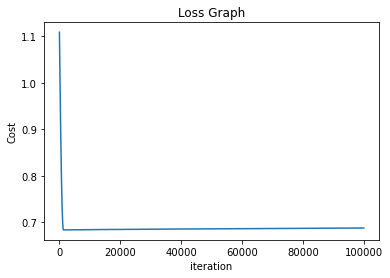

0.8260869565217391

In [20]:
model = LogitRegression(1e-3,100000)
model.fit(x_train,y_train)
model.accuracy(x_test,y_test)

In [21]:
weight_1 = model.weight
print(weight_1)

species              0.022750
island              -0.004904
bill_length_mm      -0.103501
bill_depth_mm       -0.034542
flipper_length_mm    0.266279
body_mass_g         -0.205403
dtype: float64


Cost for Iteration 0 is 1.1567609794333475
Cost for Iteration 100 is 0.7359137056031642
Cost for Iteration 200 is 0.6985448542488935
Cost for Iteration 300 is 0.6970690840647318
Cost for Iteration 400 is 0.6961705982348454
Cost for Iteration 500 is 0.6954393286564164
Cost for Iteration 600 is 0.6949962543513186
Cost for Iteration 700 is 0.6946185769710822
Cost for Iteration 800 is 0.6943263204069994
Cost for Iteration 900 is 0.6940432512466569
Cost for Iteration 1000 is 0.6937985769041254
Cost for Iteration 1100 is 0.6935609132159994
Cost for Iteration 1200 is 0.6933574363960303
Cost for Iteration 1300 is 0.6931871759871586
Cost for Iteration 1400 is 0.6929979259080166
Cost for Iteration 1500 is 0.6928368816553234
Cost for Iteration 1600 is 0.6926619854246808
Cost for Iteration 1700 is 0.6925248161420982
Cost for Iteration 1800 is 0.6924379755367612
Cost for Iteration 1900 is 0.6923359488080649
Cost for Iteration 2000 is 0.6922491912813656
Cost for Iteration 2100 is 0.6919869345697538


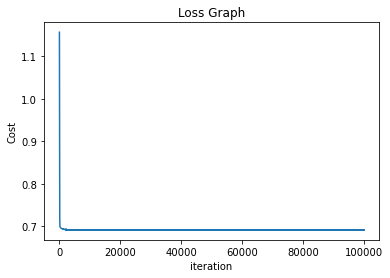

0.7681159420289855

In [22]:
model = LogitRegression(1e-2,100000)
model.fit(x_train,y_train)
model.accuracy(x_test,y_test)

In [23]:
weight_2 = model.weight
print(weight_2)

species              0.004764
island              -0.001027
bill_length_mm      -0.024591
bill_depth_mm       -0.019910
flipper_length_mm    0.085657
body_mass_g         -0.066897
dtype: float64


Cost for Iteration 0 is 1.0890073961383702
Cost for Iteration 100 is 0.6934445182909362
Cost for Iteration 200 is 0.6906250890975031
Cost for Iteration 300 is 0.6882181921149249
Cost for Iteration 400 is 0.6859113252503533
Cost for Iteration 500 is 0.6838276022624681
Cost for Iteration 600 is 0.6817082715481534
Cost for Iteration 700 is 0.6799094106990212
Cost for Iteration 800 is 0.6783553129528659
Cost for Iteration 900 is 0.6774343375591027
Cost for Iteration 1000 is 0.6767435533142541
Cost for Iteration 1100 is 0.6761065680783549
Cost for Iteration 1200 is 0.6758960979927168
Cost for Iteration 1300 is 0.675715974736558
Cost for Iteration 1400 is 0.6754789217239902
Cost for Iteration 1500 is 0.675335656714091
Cost for Iteration 1600 is 0.6751617088547344
Cost for Iteration 1700 is 0.675357307117752
Cost for Iteration 1800 is 0.6750600986871588
Cost for Iteration 1900 is 0.6752604700123459
Cost for Iteration 2000 is 0.6753209617943751
Cost for Iteration 2100 is 0.6751551670753673
Cos

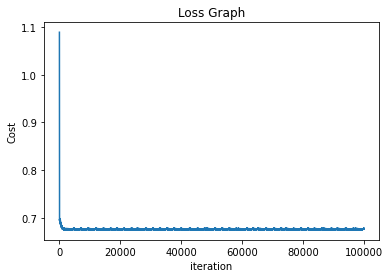

0.7246376811594203

In [24]:
model = LogitRegression(1e-1,100000)
model.fit(x_train,y_train)
model.accuracy(x_test,y_test)

In [25]:
weight_3 = model.weight
print(weight_3)

species              0.053930
island              -0.004579
bill_length_mm      -0.216635
bill_depth_mm       -0.167576
flipper_length_mm    0.823427
body_mass_g         -0.612729
dtype: float64


In [26]:
import pickle

In [27]:
pickle.dump(weight_1,open( "saitejad_vvudhaya_assignment1_part1.pickle", "wb" ))

## References

### split train and test datasets
https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

### split dataframe by percentage
https://stackoverflow.com/questions/43777243/how-to-split-a-dataframe-in-pandas-in-predefined-percentages

### Normalization with pandas
https://www.geeksforgeeks.org/data-normalization-with-pandas/

### Pickle file creation
https://wiki.python.org/moin/UsingPickle

In [28]:
1e-1

0.1